In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# ignore FutureWarning from sklearn
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [21]:
data=pd.read_csv('DataFootball.csv')

In [22]:
data

,Name,Ball_intercept_defensive,Ball_Intercept_midfield,Ball_intercept_attacking,Ball_interccept_total,Lost_ball_dribbling,Lost_ball_recieveing_ground,Lost_ball_recieveing_air,Lost_ball_total,Lost_ball_defence,Lost_ball_midfield,Lost_ball_attacking,Lost_ball_total.1,fight_win_defensive,fight_win_midfield,fight_win_attacking,fight_win_total,fight_lost_defensive,fight_lost_midfield,fight_lost_attacking,fight_lost_total,Minutes_on_field,Accurate_passes_defensiveZone,Inaccurate_passes_defensiveZone,Percent_Accurate_passes_defensiveZone,Accurate_passes_MidfieldZone,Inaccurate_passes_MidfieldZone,Percent_Accurate_passes_MidfieldZone,Accurate_passes_AttackingZone,InAccurate_passes_AttackingZone,Percent_Accurate_passes_AttackingZone,Accurate_passes_forwardDir,InAccurate_passes_forwardDir,Percent_Accurate_passes_forwardDir,Accurate_passes_across,InAccurate_passes_across,Percent_Accurate_passes_across,Accurate_passes_Back,InAccurate_passes_Back,Percent_Accurate_passes_Back,Accurate_passes_Short (1-5),InAccurate_passes_Short(1-5),Percent_Accurate_passes_Short(1-5),Accurate_passes_Medium (6-10),InAccurate_passes_Medium (6-10),Percent_Accurate_passes_Medium (6-10),Accurate_passes_Long(>10),InAccurate_passes_Long(>10),Percent_Accurate_passes_Long(>10),Accurate_passes_Total,InAccurate_passes_Total,Percent_Accurate_passes_Total,Total shots,Shots_within_6m,Shptt_6to10m,Shots_far_distance,Shots_on_goal,Shots_on_post,Shots_off_goal,Shots_blocked,Goals_from_game,Goals_from_freekick,Goals_from_corners,first_assist,Second_assist,Goal_within6m,Goal_medium_distance,Goals_far_distance,Shots_blocked.1,Goals_Plus,Goals_Minus,Goals_plus_minus
0,Edgars Andrejevs,140,3,0,143,0,0,0,0,0,0,0,0,23,0,0,23,0,0,0,0,497,425,63,0.871,8,4,0.667,0,0,0.000,244,62,0.797,188,5,0.974,1,0,1.000,88,3,0.967,152,7,0.956,193,57,0.772,433,67,0.866,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,50,-39,11
1,Emils Dobrajs,21,1,0,22,0,0,0,0,0,0,0,0,2,1,0,3,0,0,0,0,126,60,7,0.896,2,0,1.000,0,0,0.000,39,7,0.848,23,0,1.000,0,0,0.000,17,0,0.901,28,0,1.000,17,7,0.708,62,7,0.899,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,7,-5,2
2,Kristaps Stankevic,30,44,2,76,20,22,14,56,5,42,9,56,20,26,3,49,16,31,2,49,236,104,26,0.800,334,44,0.884,40,10,0.800,108,50,0.684,277,25,0.917,93,5,0.949,102,17,1.000,242,33,0.880,134,30,0.817,478,80,0.857,14,3,9,2,5,0,2,7,1,0,0,2,1,1,0,0,14,14,-19,-5
3,Kristaps Balcuns,17,22,1,40,12,13,5,30,3,19,8,30,14,29,0,43,8,21,5,34,218,77,20,0.790,250,45,0.847,38,12,0.760,76,43,0.639,191,25,0.884,98,9,0.916,82,9,0.901,169,30,0.849,114,38,0.750,365,77,0.826,32,8,7,17,6,1,15,10,0,0,1,1,2,1,0,0,9,13,-13,0
4,Elgar Ludborzs,21,32,2,55,9,7,3,19,2,12,5,19,13,24,3,40,9,24,1,34,122,70,38,0.648,142,42,0.772,15,4,0.789,65,63,0.508,120,17,0.876,42,4,0.913,58,7,0.769,97,37,0.724,72,40,0.643,227,84,0.730,16,0,8,8,7,1,5,3,0,0,0,0,1,0,0,0,8,8,-10,-2
5,Pavels Zagrebins,28,51,5,84,22,33,20,75,5,46,24,75,18,75,19,112,8,42,14,64,254,37,6,0.860,274,16,0.945,69,11,0.863,37,16,0.698,177,12,0.937,166,5,0.971,152,9,0.892,173,14,0.925,55,10,0.846,380,33,0.920,53,17,29,7,28,1,11,13,8,0,0,1,0,4,3,1,19,17,-24,-7
6,Mark Puhalskis,17,22,4,43,33,11,3,47,7,21,19,47,12,15,2,29,7,15,6,28,94,34,17,0.667,111,31,0.782,47,9,0.839,62,34,0.646,81,20,0.802,49,3,0.942,56,7,0.908,92,30,0.754,44,20,0.688,192,57,0.771,21,12,6,3,15,1,5,0,4,0,0,4,2,3,1,0,5,16,-7,9
7,Arturs Mahitarjans,65,83,6,154,61,31,11,103,10,67,26,103,51,59,13,123,15,33,14,62,250,102,25,0.803,350,58,0.858,100,20,0.833,131,52,0.716,270,40,0.871,151,11,0.932,164,18,0.901,285,55,0.838,103,30,0.774,552,103,0.843,122,22,68,32,52,8,27,35,12,0,1,4,4,4,6,3,18,40,-25,15
8,Alberts Mahitarjans,38,71,11,120,30,18,19,67,6,39,22,67,27,57,11,95,18,42,13,73,244,90,25,0.783,360,61,0.855,107,30,0.781,154,72,0.681,245,37,0.869,158,7,0.958,177,18,1.000,298,59,0.835,82,39,0.678,557,116,0.828,72,14,32,26,26,2,17,27,5,0,1,9,4,2,3,1,22,39,-24,15
9,Edgar Strautins,27,64,4,95,46,20,10,76,1,48,27,76,12,55,5,72,2,35,7,44,218,47,17,0.734,256,50,0.837,72,22,0.766,91,44,0.674,187,37,0.835,97,8,0.924,1

# Preprocessing steps

1. +- Procentnoe sootnoshenie vivesti kolonku i ejo predskazivatj
2. For each type of splitting passes take accuacy and total pases
3. For shots get percentages as well 
4. Scale remaning data (like total shots and total passes) to the minutes the person spend on the field


It is quite difficult to assess a player by the number of goals scored and conceded, so we suggest introducing a coefficient that will be equal to (goals scored - goals conceded) / goals scored. 

In [23]:
data['Goals_coef'] = data['Goals_plus_minus']/data['Goals_Plus']
data = data.drop(columns = 'Goals_plus_minus')

data=data.set_index("Name")


In [24]:
# Let's remove some not really important details and see the whole picture of our statistics

#data = data.drop(columns = 'Accurate_passes_defensiveZone')
#data = data.drop(columns = 'Inaccurate_passes_defensiveZone')
#data = data.drop(columns = 'Accurate_passes_MidfieldZone')
#data = data.drop(columns = 'Inaccurate_passes_MidfieldZone')
#data = data.drop(columns = 'Accurate_passes_AttackingZone')
#data = data.drop(columns = 'InAccurate_passes_AttackingZone')

#data = data.drop(columns = 'Accurate_passes_forwardDir')
#data = data.drop(columns = 'InAccurate_passes_forwardDir')
#data = data.drop(columns = 'Accurate_passes_across')
#data = data.drop(columns = 'InAccurate_passes_across')
#data = data.drop(columns = 'Accurate_passes_Back')
#data = data.drop(columns = 'InAccurate_passes_Back')

#data = data.drop(columns = 'Accurate_passes_Short (1-5)')
#data = data.drop(columns = 'InAccurate_passes_Short(1-5)')
#data = data.drop(columns = 'Accurate_passes_Medium (6-10)')
#data = data.drop(columns = 'InAccurate_passes_Medium (6-10)')
#data = data.drop(columns = 'Accurate_passes_Long(>10)')
#data = data.drop(columns = 'InAccurate_passes_Long(>10)')

#data = data.drop(columns = 'Accurate_passes_Total')
#data = data.drop(columns = 'InAccurate_passes_Total')

data['Shots_on_goal'] = data['Shots_on_goal'] + data['Shots_on_post']
data = data.drop(columns = 'Shots_on_post')


pd.options.display.max_columns = 80
data

,Ball_intercept_defensive,Ball_Intercept_midfield,Ball_intercept_attacking,Ball_interccept_total,Lost_ball_dribbling,Lost_ball_recieveing_ground,Lost_ball_recieveing_air,Lost_ball_total,Lost_ball_defence,Lost_ball_midfield,Lost_ball_attacking,Lost_ball_total.1,fight_win_defensive,fight_win_midfield,fight_win_attacking,fight_win_total,fight_lost_defensive,fight_lost_midfield,fight_lost_attacking,fight_lost_total,Minutes_on_field,Accurate_passes_defensiveZone,Inaccurate_passes_defensiveZone,Percent_Accurate_passes_defensiveZone,Accurate_passes_MidfieldZone,Inaccurate_passes_MidfieldZone,Percent_Accurate_passes_MidfieldZone,Accurate_passes_AttackingZone,InAccurate_passes_AttackingZone,Percent_Accurate_passes_AttackingZone,Accurate_passes_forwardDir,InAccurate_passes_forwardDir,Percent_Accurate_passes_forwardDir,Accurate_passes_across,InAccurate_passes_across,Percent_Accurate_passes_across,Accurate_passes_Back,InAccurate_passes_Back,Percent_Accurate_passes_Back,Accurate_passes_Short (1-5),InAccurate_passes_Short(1-5),Percent_Accurate_passes_Short(1-5),Accurate_passes_Medium (6-10),InAccurate_passes_Medium (6-10),Percent_Accurate_passes_Medium (6-10),Accurate_passes_Long(>10),InAccurate_passes_Long(>10),Percent_Accurate_passes_Long(>10),Accurate_passes_Total,InAccurate_passes_Total,Percent_Accurate_passes_Total,Total shots,Shots_within_6m,Shptt_6to10m,Shots_far_distance,Shots_on_goal,Shots_off_goal,Shots_blocked,Goals_from_game,Goals_from_freekick,Goals_from_corners,first_assist,Second_assist,Goal_within6m,Goal_medium_distance,Goals_far_distance,Shots_blocked.1,Goals_Plus,Goals_Minus,Goals_coef
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Edgars Andrejevs,140,3,0,143,0,0,0,0,0,0,0,0,23,0,0,23,0,0,0,0,497,425,63,0.871,8,4,0.667,0,0,0.000,244,62,0.797,188,5,0.974,1,0,1.000,88,3,0.967,152,7,0.956,193,57,0.772,433,67,0.866,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,50,-39,0.220000
Emils Dobrajs,21,1,0,22,0,0,0,0,0,0,0,0,2,1,0,3,0,0,0,0,126,60,7,0.896,2,0,1.000,0,0,0.000,39,7,0.848,23,0,1.000,0,0,0.000,17,0,0.901,28,0,1.000,17,7,0.708,62,7,0.899,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,7,-5,0.285714
Kristaps Stankevic,30,44,2,76,20,22,14,56,5,42,9,56,20,26,3,49,16,31,2,49,236,104,26,0.800,334,44,0.884,40,10,0.800,108,50,0.684,277,25,0.917,93,5,0.949,102,17,1.000,242,33,0.880,134,30,0.817,478,80,0.857,14,3,9,2,5,2,7,1,0,0,2,1,1,0,0,14,14,-19,-0.357143
Kristaps Balcuns,17,22,1,40,12,13,5,30,3,19,8,30,14,29,0,43,8,21,5,34,218,77,20,0.790,250,45,0.847,38,12,0.760,76,43,0.639,191,25,0.884,98,9,0.916,82,9,0.901,169,30,0.849,114,38,0.750,365,77,0.826,32,8,7,17,7,15,10,0,0,1,1,2,1,0,0,9,13,-13,0.000000
Elgar Ludborzs,21,32,2,55,9,7,3,19,2,12,5,19,13,24,3,40,9,24,1,34,122,70,38,0.648,142,42,0.772,15,4,0.789,65,63,0.508,120,17,0.876,42,4,0.913,58,7,0.769,97,37,0.724,72,40,0.643,227,84,0.730,16,0,8,8,8,5,3,0,0,0,0,1,0,0,0,8,8,-10,-0.250000
Pavels Zagrebins,28,51,5,84,22,33,20,75,5,46,24,75,18,75,19,112,8,42,14,64,254,37,6,0.860,274,16,0.945,69,11,0.863,37,16,0.698,177,12,0.937,166,5,0.971,152,9,0.892,173,14,0.925,55,10,0.846,380,33,0.920,53,17,29,7,29,11,13,8,0,0,1,0,4,3,1,19,17,-24,-0.411765
Mark Puhalskis,17,22,4,43,33,11,3,47,7,21,19,47,12,15,2,29,7,15,6,28,94,34,17,0.667,111,31,0.782,47,9,0.839,62,34,0.646,81,20,0.802,49,3,0.942,56,7,0.908,92,30,0.754,44,20,0.688,192,57,0.771,21,12,6,3,16,5,0,4,0,0,4,2,3,1,0,5,16,-7,0.562500
Arturs Mahitarjans,65,83,6,154,61,31,11,103,10,67,26,103,51,59,13,123,15,33,14,62,250,102,25,0.803,350,58,0.858,100,20,0.833,131,52,0.716,270,40,0.871,151,11,0.932,164,18,0.901,285,55,0.838,103,30,0.774,552,103,0.843,122,22,68,32,60,27,35,12,0,1,4,4,4,6,3,18,40,-25,0.375000
Alberts Mahitarjans,38,71,11,120,30,18,19,67,6,39,22,67,27,57,11,95,18,42,13,73,244,90,25,0.783,360,61,0.855,107,30,0.781,154,72,0.681,245,37,0.869,158,7,0.958,177,18,1.000,298,59,0.835,82,39,0.678,557,116,0.828,72,14,32,26,28,17,27,5,0,1,9,4,2,3,1,22,39,-24,0.384615


You may notice that one of the values in the "Goals_coef" column is NaN. This happened in connection with the division by 0. We can replace this value.

In [25]:
data.Goals_coef.fillna(0, inplace=True)
data.Goals_coef

Name
Edgars Andrejevs       0.220000
Emils Dobrajs          0.285714
Kristaps Stankevic    -0.357143
Kristaps Balcuns       0.000000
Elgar Ludborzs        -0.250000
Pavels Zagrebins      -0.411765
Mark Puhalskis         0.562500
Arturs Mahitarjans     0.375000
Alberts Mahitarjans    0.384615
Edgar Strautins        0.648649
Shota Giorgadze       -1.333333
Zanis Pinka            0.640000
Andrejs Kravcenkovs    0.250000
Raimonds Pavulins      0.000000
Nikolas Petriga        0.500000
Aleksandrs Radcenko   -0.857143
Name: Goals_coef, dtype: float64

Players spend different time on the field. So players that played more would have more shots, passes and etc. So we want to scale all the counts to count per minute spend on the field. To do that we devide each feature that has counts (not percentage) by the time spend on the field.

In [26]:
count_features=[]
for i in data.columns:
    if 'Percent' not in i and 'Minus' not in i and 'Plus' not in i and 'coef' not in i and 'Name' not in i and 'Minutes' not in i:
        count_features.append(i)

count_features

['Ball_intercept_defensive',
 'Ball_Intercept_midfield',
 'Ball_intercept_attacking',
 'Ball_interccept_total',
 'Lost_ball_dribbling',
 'Lost_ball_recieveing_ground',
 'Lost_ball_recieveing_air',
 'Lost_ball_total',
 'Lost_ball_defence',
 'Lost_ball_midfield',
 'Lost_ball_attacking',
 'Lost_ball_total.1',
 'fight_win_defensive',
 'fight_win_midfield',
 'fight_win_attacking',
 'fight_win_total',
 'fight_lost_defensive',
 'fight_lost_midfield',
 'fight_lost_attacking',
 'fight_lost_total',
 'Accurate_passes_defensiveZone',
 'Inaccurate_passes_defensiveZone',
 'Accurate_passes_MidfieldZone',
 'Inaccurate_passes_MidfieldZone',
 'Accurate_passes_AttackingZone',
 'InAccurate_passes_AttackingZone',
 'Accurate_passes_forwardDir',
 'InAccurate_passes_forwardDir',
 'Accurate_passes_across',
 'InAccurate_passes_across',
 'Accurate_passes_Back',
 'InAccurate_passes_Back',
 'Accurate_passes_Short (1-5)',
 'InAccurate_passes_Short(1-5)',
 'Accurate_passes_Medium (6-10)',
 'InAccurate_passes_Medium 

In [27]:
for i in count_features:
    data[i]=(data[i]/data.Minutes_on_field)*100

In [28]:
data

,Ball_intercept_defensive,Ball_Intercept_midfield,Ball_intercept_attacking,Ball_interccept_total,Lost_ball_dribbling,Lost_ball_recieveing_ground,Lost_ball_recieveing_air,Lost_ball_total,Lost_ball_defence,Lost_ball_midfield,Lost_ball_attacking,Lost_ball_total.1,fight_win_defensive,fight_win_midfield,fight_win_attacking,fight_win_total,fight_lost_defensive,fight_lost_midfield,fight_lost_attacking,fight_lost_total,Minutes_on_field,Accurate_passes_defensiveZone,Inaccurate_passes_defensiveZone,Percent_Accurate_passes_defensiveZone,Accurate_passes_MidfieldZone,Inaccurate_passes_MidfieldZone,Percent_Accurate_passes_MidfieldZone,Accurate_passes_AttackingZone,InAccurate_passes_AttackingZone,Percent_Accurate_passes_AttackingZone,Accurate_passes_forwardDir,InAccurate_passes_forwardDir,Percent_Accurate_passes_forwardDir,Accurate_passes_across,InAccurate_passes_across,Percent_Accurate_passes_across,Accurate_passes_Back,InAccurate_passes_Back,Percent_Accurate_passes_Back,Accurate_passes_Short (1-5),InAccurate_passes_Short(1-5),Percent_Accurate_passes_Short(1-5),Accurate_passes_Medium (6-10),InAccurate_passes_Medium (6-10),Percent_Accurate_passes_Medium (6-10),Accurate_passes_Long(>10),InAccurate_passes_Long(>10),Percent_Accurate_passes_Long(>10),Accurate_passes_Total,InAccurate_passes_Total,Percent_Accurate_passes_Total,Total shots,Shots_within_6m,Shptt_6to10m,Shots_far_distance,Shots_on_goal,Shots_off_goal,Shots_blocked,Goals_from_game,Goals_from_freekick,Goals_from_corners,first_assist,Second_assist,Goal_within6m,Goal_medium_distance,Goals_far_distance,Shots_blocked.1,Goals_Plus,Goals_Minus,Goals_coef
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Edgars Andrejevs,28.169014,0.603622,0.000000,28.772636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.627767,0.000000,0.000000,4.627767,0.000000,0.000000,0.000000,0.000000,497,85.513078,12.676056,0.871,1.609658,0.804829,0.667,0.000000,0.000000,0.000,49.094567,12.474849,0.797,37.826962,1.006036,0.974,0.201207,0.000000,1.000,17.706237,0.603622,0.967,30.583501,1.408451,0.956,38.832998,11.468813,0.772,87.122736,13.480885,0.866,0.000000,0.000000,0.000000,0.201207,0.000000,0.201207,0.000000,0.000000,0.000000,0.000000,0.000000,0.201207,0.000000,0.000000,0.000000,0.000000,50,-39,0.220000
Emils Dobrajs,16.666667,0.793651,0.000000,17.460317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.587302,0.793651,0.000000,2.380952,0.000000,0.000000,0.000000,0.000000,126,47.619048,5.555556,0.896,1.587302,0.000000,1.000,0.000000,0.000000,0.000,30.952381,5.555556,0.848,18.253968,0.000000,1.000,0.000000,0.000000,0.000,13.492063,0.000000,0.901,22.222222,0.000000,1.000,13.492063,5.555556,0.708,49.206349,5.555556,0.899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.793651,0.000000,0.000000,0.000000,0.000000,7,-5,0.285714
Kristaps Stankevic,12.711864,18.644068,0.847458,32.203390,8.474576,9.322034,5.932203,23.728814,2.118644,17.796610,3.813559,23.728814,8.474576,11.016949,1.271186,20.762712,6.779661,13.135593,0.847458,20.762712,236,44.067797,11.016949,0.800,141.525424,18.644068,0.884,16.949153,4.237288,0.800,45.762712,21.186441,0.684,117.372881,10.593220,0.917,39.406780,2.118644,0.949,43.220339,7.203390,1.000,102.542373,13.983051,0.880,56.779661,12.711864,0.817,202.542373,33.898305,0.857,5.932203,1.271186,3.813559,0.847458,2.118644,0.847458,2.966102,0.423729,0.000000,0.000000,0.847458,0.423729,0.423729,0.000000,0.000000,5.932203,14,-19,-0.357143
Kristaps Balcuns,7.798165,10.091743,0.458716,18.348624,5.504587,5.963303,2.293578,13.761468,1.376147,8.715596,3.669725,13.761468,6.422018,13.302752,0.000000,19.724771,3.669725,9.633028,2.293578,15.596330,218,35.321101,9.174312,0.790,114.678899,20.642202,0.847,17.431193,5.504587,0.760,34.862385,19.724771,0.639,87.614679,11.467890,0.884,44.954128,4.128440,0.916,37.614679,4.128440,0.901,77.522936,13.761468,0.849,52.293578,17.431193,0.750,167.431193,35.3

In [29]:
# Machine learning starts here :D

In [30]:
X = data.drop("Goals_coef", axis = 1)
y = data.Goals_coef

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [31]:
# We need to work with LeaveOneOut
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
cv = loo.split(X_train, y_train)

In [32]:
#list(data.columns)

In [33]:
data.shape

(16, 70)

In [34]:
type(data)

pandas.core.frame.DataFrame

In [35]:
correlation = data.corr()
correlation.shape

(70, 70)

In [36]:
type(correlation)

pandas.core.frame.DataFrame

In [37]:
pd.options.display.max_rows = 64

In [38]:
#for row in correlation:
#    correlation["desired"] = correlation[row] > 0.5

In [39]:
#shape = (30, 64)
#data = np.random.normal(size=shape)
#data[:, 10] += data[:, 20]
#df = pd.DataFrame(data)
#c = df.corr().abs()
#s = c.unstack()
#so = s.sort_values(kind="quicksort")
#print (so[-74:-64])

In [40]:
cori = abs(correlation)


In [41]:
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol2 = (cori.where(np.triu(np.ones(cori.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
#first element of sol series is the pair with the bigest correlation

In [42]:
sol2

Lost_ball_total                     Lost_ball_total.1              1.000000
Accurate_passes_across              Accurate_passes_Total          0.970282
Inaccurate_passes_MidfieldZone      InAccurate_passes_Total        0.969075
InAccurate_passes_forwardDir        InAccurate_passes_Total        0.955410
                                    InAccurate_passes_Long(>10)    0.953440
                                                                     ...   
Ball_intercept_defensive            Lost_ball_midfield             0.001803
Lost_ball_dribbling                 Shots_blocked                  0.001654
Ball_intercept_defensive            Accurate_passes_Short (1-5)    0.001160
Percent_Accurate_passes_Short(1-5)  Shots_blocked.1                0.000998
Accurate_passes_defensiveZone       Goals_coef                     0.000006
Length: 2415, dtype: float64

In [43]:
type(sol2)

pandas.core.series.Series

In [44]:
# https://stackoverflow.com/questions/16958499/sort-pandas-dataframe-and-print-highest-n-values
# df[['Bytes', 'Client Ip']].sort_values('Bytes', ascending=False).nlargest(10, 'Bytes')

In [45]:
#dd = pd.DataFrame()
#dd['sol']=sol2
#sol2[0]

In [46]:
sol2df = pd.DataFrame(sol2)

In [47]:
sol2df.shape

(2415, 1)

In [48]:
#names = ['feat1','feat2' , 'corr_val']
#sol2df.columns = names
#sol2df

In [49]:
# sol2df[['Bytes', 'Client Ip']].sort_values('Bytes', ascending=False).nlargest(10, 'Bytes')

In [50]:
sol2df.head(60)

0
Lost_ball_total                       Lost_ball_total.1                      1.000000
Accurate_passes_across                Accurate_passes_Total                  0.970282
Inaccurate_passes_MidfieldZone        InAccurate_passes_Total                0.969075
InAccurate_passes_forwardDir          InAccurate_passes_Total                0.955410
                                      InAccurate_passes_Long(>10)            0.953440
Accurate_passes_Medium (6-10)         Accurate_passes_Total                  0.953420
Accurate_passes_MidfieldZone          Accurate_passes_across                 0.953018
Inaccurate_passes_MidfieldZone        InAccurate_passes_Medium (6-10)        0.952936
Accurate_passes_MidfieldZone          Accurate_passes_Total                  0.949099
Inaccurate_passes_defensiveZone       InAccurate_passes_Long(>10)            0.945602
Accurate_passes_MidfieldZone          Accurate_passes_Medium (6-10)          0.942505
fight_win_midfield                    fight_win_total                        0.941578
fight_lost_midfield                   fight_lost_total                       0.932777
Total shots                           Shots_off_goal                         0.931183
Minutes_on_field                      Goals_Minus                            0.931033
Lost_ball_total                       Lost_ball_midfield                     0.929726
Lost_ball_midfield                    Lost_ball_total.1                      0.929726
InAccurate_passes_Medium (6-10)       InAccurate_passes_Total                0.929167
Accurate_passes_across                Accurate_passes_Medium (6-10)          0.916702
Shots_within_6m                       Goal_within6m                          0.915715
Lost_ball_attacking                   Lost_ball_total.1                      0.907939
Lost_ball_total                       Lost_ball_attacking                    0.907939
InAccurate_passes_AttackingZone       first_assist                           0.904024
Total shots                           Shptt_6to10m                           0.902264
Shots_far_distance                    Shots_off_goal                         0.899248
Inaccurate_passes_MidfieldZone        InAccurate_passes_forwardDir           0.898278
Inaccurate_passes_defensiveZone       InAccurate_passes_forwardDir           0.894175
Percent_Accurate_passes_forwardDir    Percent_Accurate_passes_Total          0.888255
InAccurate_passes_Long(>10)           InAccurate_passes_Total                0.885436
Percent_Accurate_passes_across        Percent_Accurate_passes_Medium (6-10)  0.884572
Percent_Accurate_passes_defensiveZone Percent_Accurate_passes_forwardDir     0.884213
Goals_from_game                       Goal_within6m                          0.881386
Shots_on_goal                         Goals_from_game                        0.879053
Lost_ball_attacking                   Accurate_passes_AttackingZone          0.878153
InAccurate_passes_across              Percent_Accurate_passes_across         0.877646
Goals_from_game                       Goal_medium_distance                   0.877077
InAccurate_passes_Medium (6-10)       Percent_Accurate_passes_Medium (6-10)  0.875153
Shptt_6to10m                          Shots_blocked                          0.874872
fight_lost_attacking                  Shots_within_6m                        0.874368
InAccurate_passes_across              InAccurate_passes_Medium (6-10)        0.873125
Lost_ball_total.1                     Accurate_passes_AttackingZone          0.872363
Lost_ball_total                       Accurate_passes_AttackingZone          0.872363
Accurate_passes_MidfieldZone          Percent_Accurate_passes_AttackingZone  0.865932
Accurate_passes_Back                  Accurate_passes_Short (1-5)            0.860861
Total shots                           Shots_far_distance                     0.856908
Percent_Accurate_passes_AttackingZone Accurate_passes_Back                   0.851390
fight_win_total                       Accu

In [51]:
corabs = abs(correlation)

In [52]:
corabs.Goals_coef

Ball_intercept_defensive    0.359682
Ball_Intercept_midfield     0.130764
Ball_intercept_attacking    0.151923
Ball_interccept_total       0.332290
Lost_ball_dribbling         0.329109
                              ...   
Goals_far_distance          0.179450
Shots_blocked.1             0.080111
Goals_Plus                  0.412607
Goals_Minus                 0.113734
Goals_coef                  1.000000
Name: Goals_coef, Length: 70, dtype: float64

In [53]:
corabs[['Goals_coef']].sort_values('Goals_coef', ascending=False).nlargest(15, 'Goals_coef')

,Goals_coef
Goals_coef,1.000000
Goal_medium_distance,0.486701
Second_assist,0.436395
Shots_within_6m,0.435603
Goals_from_game,0.435333
Shots_on_goal,0.424096
Goal_within6m,0.413915
Goals_Plus,0.412607
Accurate_passes_AttackingZone,0.407867
Total shots,0.396357


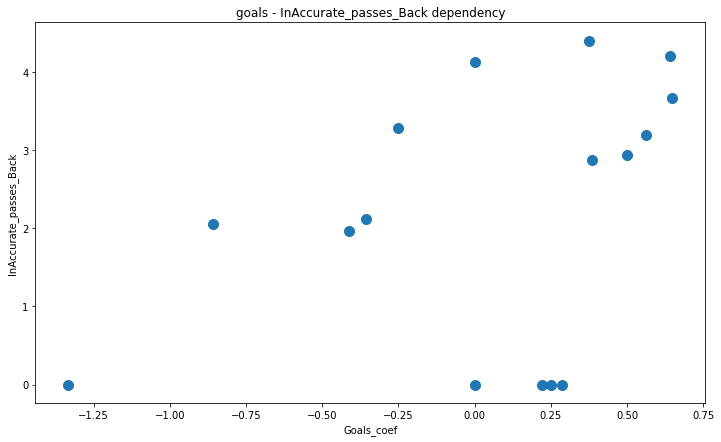

In [54]:
# goals - InAccurate_passes_Back dependency plor
## any meaning from this correlation?  1/3
plt.figure(figsize=(12,7))
plt.scatter(data.Goals_coef,
            data.InAccurate_passes_Back,
            s = 100)

plt.xlabel('Goals_coef')
plt.ylabel('InAccurate_passes_Back')
plt.title('goals - InAccurate_passes_Back dependency')
plt.show()


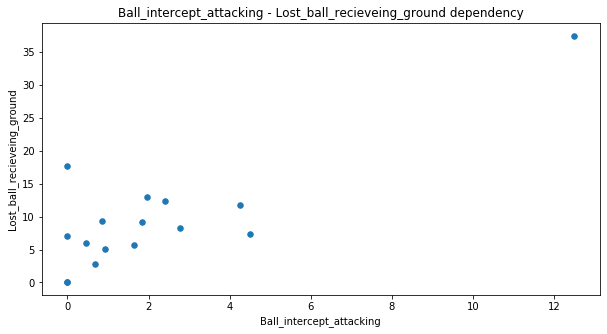

In [55]:
#########  Ball_intercept_attacking	Lost_ball_recieveing_ground	0.832297
## any comment?    2/3
plt.figure(figsize=(10, 5))
plt.scatter(data.Ball_intercept_attacking,
            data.Lost_ball_recieveing_ground,
            s = 30)

plt.xlabel('Ball_intercept_attacking')
plt.ylabel('Lost_ball_recieveing_ground')
plt.title('Ball_intercept_attacking - Lost_ball_recieveing_ground dependency')
plt.show()

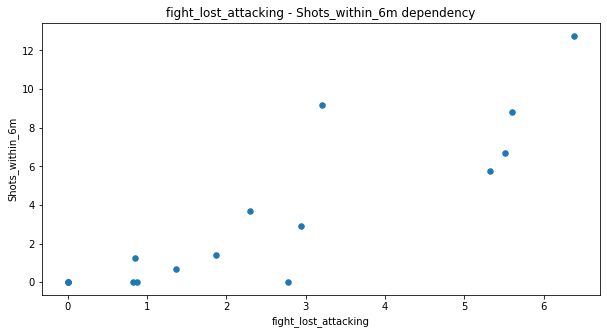

In [56]:
###### fight_lost_attacking	Shots_within_6m	0.874368
## any comment here?   3/3
plt.figure(figsize=(10, 5))
plt.scatter(data.fight_lost_attacking,
            data.Shots_within_6m,
            s = 30)

plt.xlabel('fight_lost_attacking')
plt.ylabel('Shots_within_6m')
plt.title('fight_lost_attacking - Shots_within_6m dependency')
plt.show()

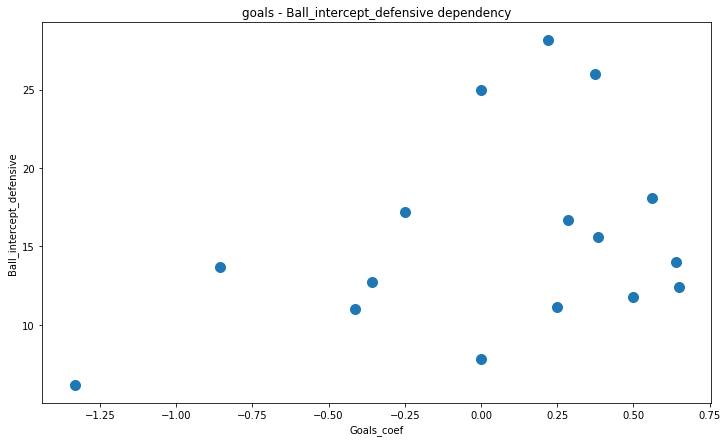

In [57]:
# goals - Ball_intercept_defensive dependency plot
plt.figure(figsize=(12,7))
plt.scatter(data.Goals_coef,
            data.Ball_intercept_defensive,
            s = 100)

plt.xlabel('Goals_coef')
plt.ylabel('Ball_intercept_defensive')
plt.title('goals - Ball_intercept_defensive dependency')
plt.show()

# players active in defensive tactics score as well -- active players are successful
# smart defencive actions are important for player effficiency 

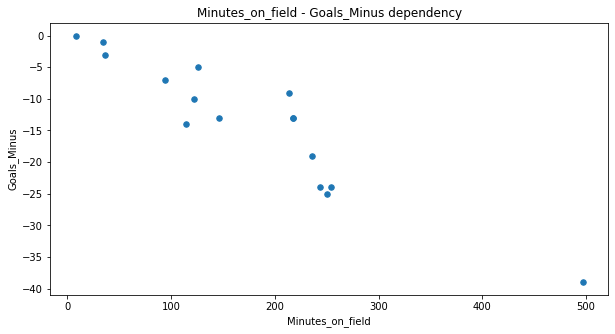

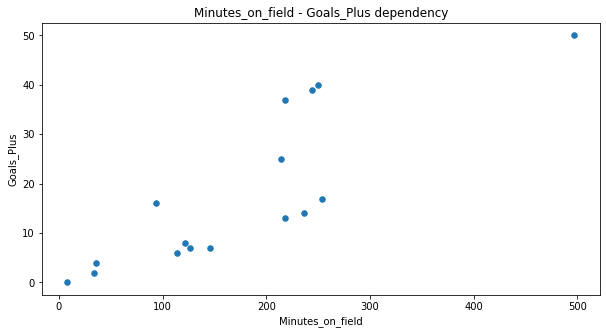

In [58]:
########  Minutes_on_field	Goals_Minus	0.931033
## players that spend more time on the field allow less goals scored
## which demostrates the correct chioce of the coach of reliable players having more playtime
plt.figure(figsize=(10, 5))
plt.scatter(data.Minutes_on_field,
            data.Goals_Minus,
            s = 30)

plt.xlabel('Minutes_on_field')
plt.ylabel('Goals_Minus')
plt.title('Minutes_on_field - Goals_Minus dependency')
plt.show()
#########   Minutes_on_field	Goals_Plus	0.839684
## players that spend more time on the field allow more goals scored
## which demostrates the correct chioce of the coach of reliable players having more playtime
plt.figure(figsize=(10, 5))
plt.scatter(data.Minutes_on_field,
            data.Goals_Plus,
            s = 30)

plt.xlabel('Minutes_on_field')
plt.ylabel('Goals_Plus')
plt.title('Minutes_on_field - Goals_Plus dependency')
plt.show()

In [70]:
real_lb_AttDef = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]

data['real_lb_AttDef'] = real_lb_AttDef 
data.shape

(16, 71)

Text(0.5, 1.0, 'Lost_ball_dribbling - Shots_on_goal dependency')

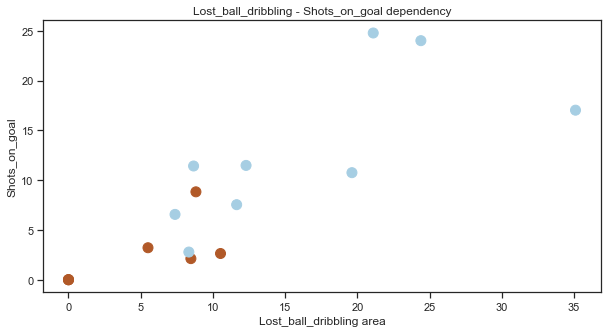

In [71]:
########  Lost_ball_dribbling	Shots_on_goal	0.825621
## demostrates generally active players, those who lose ball dribbling also score - 
# two signs of activity and efficiency
plt.figure(figsize=(10, 5))
plt.scatter(data.Lost_ball_dribbling,
            data.Shots_on_goal,
            s = 100,
            c= data.real_lb_AttDef,
            cmap='Paired')

plt.xlabel('Lost_ball_dribbling area')
plt.ylabel('Shots_on_goal')
plt.title('Lost_ball_dribbling - Shots_on_goal dependency')



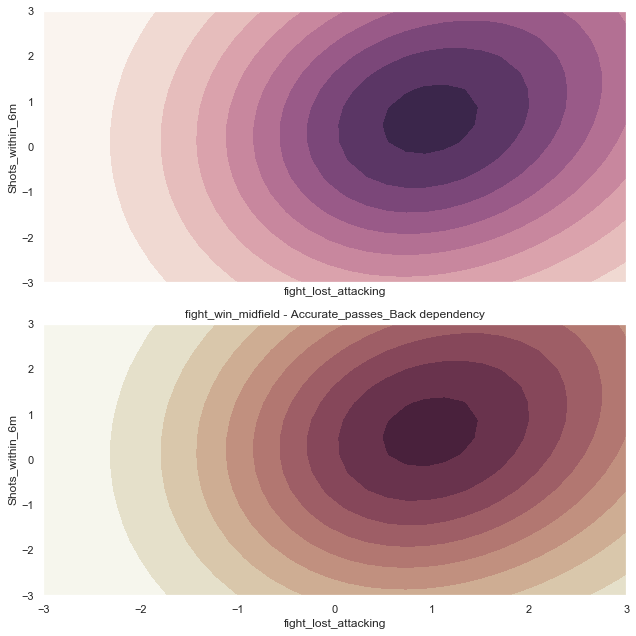

In [72]:
#######   fight_win_midfield	Accurate_passes_Back	0.843666
## therefore when one wins in the midfield, that one should pass it back
## this is an actual piece of tactics, fancy to observe such a correlation
sns.set(style="dark")

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x = data.fight_lost_attacking
    y = data.Shots_within_6m
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))
plt.title('fight_win_midfield - Accurate_passes_Back dependency')
f.tight_layout()



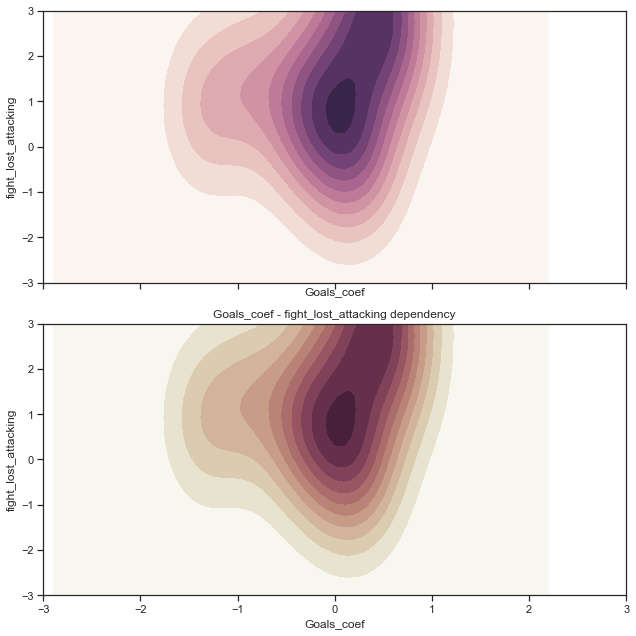

In [73]:
# goals - fight_lost_attacking dependency
# we expected the opposite we explain that the one who loses many attacks is generally active in attacks which
# is related to his efficency positively 
sns.set(style="ticks")

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x = data.Goals_coef
    y = data.fight_lost_attacking
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))
plt.title('Goals_coef - fight_lost_attacking dependency')
f.tight_layout()
# white, dark, whitegrid, darkgrid, ticks
#plt.figure(figsize=(10,5))
#plt.scatter(data.Goals_coef, data.fight_lost_attacking, s = 100)
#plt.xlabel('Goals_coef')
#plt.ylabel('fight_lost_attacking')
#plt.title('goals - fight_lost_attacking dependency')
#plt.show()

In [63]:
cormatr = data.corr()
cormatr.shape

(71, 71)

In [64]:
cormatr_abs = abs(cormatr)

In [65]:
cormatr_abs[['real_lb_AttDef']].sort_values('real_lb_AttDef', ascending=False).nlargest(15, 'real_lb_AttDef')

,real_lb_AttDef
real_lb_AttDef,1.000000
Shots_blocked.1,0.779027
fight_lost_total,0.760763
fight_win_total,0.758996
fight_win_attacking,0.737210
fight_win_midfield,0.732440
Goals_from_game,0.695534
fight_lost_midfield,0.692838
Goal_medium_distance,0.688779
Shots_on_goal,0.675115


In [66]:
# due to the data strucuture the boxplots were a failure regardless various attemots of normalization attempts
# below lies an exmple of those experiments

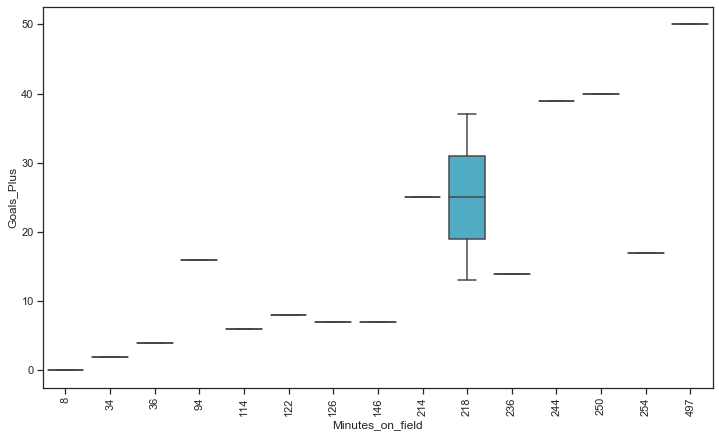

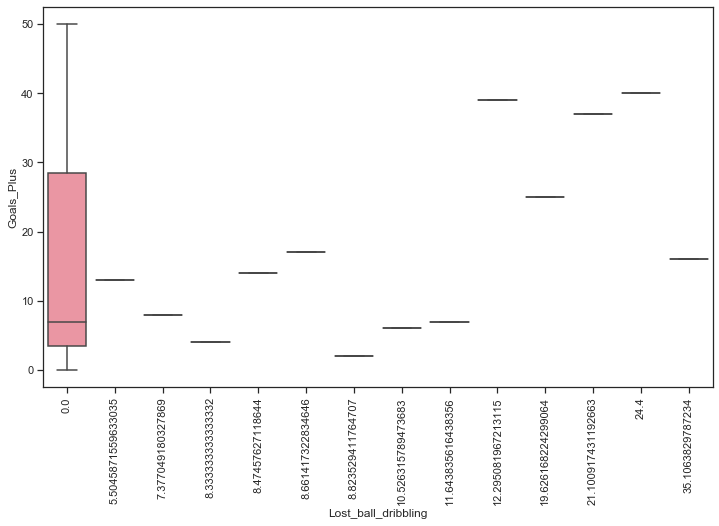

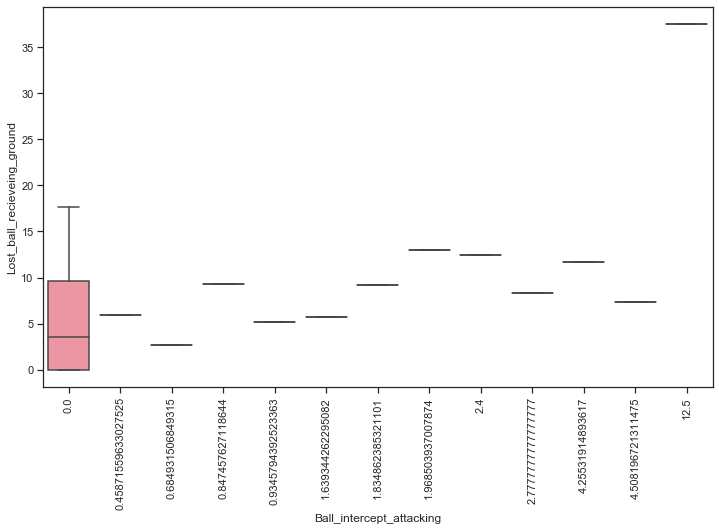

In [68]:
#########   Minutes_on_field	Goals_Plus	0.839684
plt.figure(figsize=(12,7))
plt.xticks(rotation="vertical")
sns.boxplot(x="Minutes_on_field", y="Goals_Plus", data=data)
########  Lost_ball_dribbling	Shots_on_goal	0.825621
plt.figure(figsize=(12,7))
plt.xticks(rotation="vertical")
sns.boxplot(x="Lost_ball_dribbling", y="Goals_Plus", data=data)
#########  Ball_intercept_attacking	Lost_ball_recieveing_ground	0.832297
plt.figure(figsize=(12,7))
plt.xticks(rotation="vertical")
sns.boxplot(x="Ball_intercept_attacking", y="Lost_ball_recieveing_ground", data=data)

In [69]:
cols = data.columns
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
df_normalized = pd.DataFrame(np_scaled, columns = cols)
df_normalized


,Ball_intercept_defensive,Ball_Intercept_midfield,Ball_intercept_attacking,Ball_interccept_total,Lost_ball_dribbling,Lost_ball_recieveing_ground,Lost_ball_recieveing_air,Lost_ball_total,Lost_ball_defence,Lost_ball_midfield,Lost_ball_attacking,Lost_ball_total.1,fight_win_defensive,fight_win_midfield,fight_win_attacking,fight_win_total,fight_lost_defensive,fight_lost_midfield,fight_lost_attacking,fight_lost_total,Minutes_on_field,Accurate_passes_defensiveZone,Inaccurate_passes_defensiveZone,Percent_Accurate_passes_defensiveZone,Accurate_passes_MidfieldZone,Inaccurate_passes_MidfieldZone,Percent_Accurate_passes_MidfieldZone,Accurate_passes_AttackingZone,InAccurate_passes_AttackingZone,Percent_Accurate_passes_AttackingZone,Accurate_passes_forwardDir,InAccurate_passes_forwardDir,Percent_Accurate_passes_forwardDir,Accurate_passes_across,InAccurate_passes_across,Percent_Accurate_passes_across,Accurate_passes_Back,InAccurate_passes_Back,Percent_Accurate_passes_Back,Accurate_passes_Short (1-5),InAccurate_passes_Short(1-5),Percent_Accurate_passes_Short(1-5),Accurate_passes_Medium (6-10),InAccurate_passes_Medium (6-10),Percent_Accurate_passes_Medium (6-10),Accurate_passes_Long(>10),InAccurate_passes_Long(>10),Percent_Accurate_passes_Long(>10),Accurate_passes_Total,InAccurate_passes_Total,Percent_Accurate_passes_Total,Total shots,Shots_within_6m,Shptt_6to10m,Shots_far_distance,Shots_on_goal,Shots_off_goal,Shots_blocked,Goals_from_game,Goals_from_freekick,Goals_from_corners,first_assist,Second_assist,Goal_within6m,Goal_medium_distance,Goals_far_distance,Shots_blocked.1,Goals_Plus,Goals_Minus,Goals_coef,real_lb_AttDef
0,2.083985,-1.907877,-0.723631,-0.743117,-1.229638,-1.123496,-1.470032,-1.877200,-1.114142,-1.965612,-1.370225,-1.877200,-1.130413,-2.025910,-0.921285,-1.852051,-1.397714,-2.174565,-1.180175,-2.122917,2.787001,2.153535,0.146325,0.709152,-2.186774,-1.736058,-2.277867,-1.619960,-1.573610,-2.460163,-0.054301,-0.776341,0.903854,-1.588870,-1.971245,1.618423,-2.152218,-1.340930,0.451633,-1.870022,-1.616794,1.180813,-1.737823,-1.746756,1.604139,-0.146723,-0.377832,0.382423,-1.490311,-1.287813,0.670077,-1.333788,-0.836919,-1.201607,-1.095538,-1.075564,-1.153317,-1.048399,-0.819792,-0.334364,-0.575591,-1.177398,-0.819214,-0.671286,-0.781002,-0.778076,-1.698047,2.126303,-2.508281,0.329338,1.133893
1,0.197864,-1.889227,-0.723631,-1.686954,-1.229638,-1.123496,-1.470032,-1.877200,-1.114142,-1.965612,-1.370225,-1.877200,-1.852842,-1.922611,-0.921285,-2.038799,-1.397714,-2.174565,-1.180175,-2.122917,-0.430980,0.236455,-0.772930,0.885449,-2.187224,-1.804871,2.135397,-1.619960,-1.573610,-2.460163,-0.816632,-1.217265,1.293265,-2.239509,-2.148441,2.077989,-2.163120,-1.340930,-3.839415,-2.123339,-1.806540,0.021948,-2.003519,-1.892897,2.209669,-1.379878,-1.003061,-0.145341,-2.126561,-1.687257,1.201309,-1.333788,-0.836919,-1.201607,-1.124665,-1.075564,-1.190950,-1.048399,-0.819792,-0.334364,-0.575591,-1.177398,-0.088467,-0.671286,-0.781002,-0.778076,-1.698047,-0.714273,0.860867,0.450290,1.133893
2,-0.450633,-0.137354,-0.441757,-0.456874,-0.312897,-0.028585,0.999123,-0.056433,-0.024805,0.317147,-0.620874,-0.056433,-0.216393,-0.591982,-0.323711,-0.510966,0.326512,0.044243,-0.778403,-0.009783,0.523139,0.056795,-0.067866,0.208471,0.629701,-0.210796,0.598044,-0.412912,-0.528514,0.468058,-0.194305,-0.221205,0.041041,1.055367,-0.282635,0.610913,-0.028041,-0.035717,0.232789,-0.336355,0.457814,1.760246,0.548811,-0.442015,0.558223,0.726607,-0.246400,0.753508,0.446469,-0.258756,0.525196,-0.964359,-0.516593,-0.758430,-1.001987,-0.801608,-1.032446,-0.587357,-0.601883,-0.334364,-0.575591,-0.581401,-0.544746,-0.298412,-0.781002,-0.778076,0.069326,-0.251853,-0.526429,-0.732939,1.133893
3,-1.256366,-0.976695,-0.571057,-1.612838,-0.634177,-0.423082,-0.515379,-0.821251,-0.406573,-0.847668,-0.649137,-0.821251,-0.704090,-0.294470,-0.921285,-0.597236,-0.464417,-0.547396,-0.092812,-0.535594,0.367010,-0.385705,-0.305749,0.137952,0.089286,-0.039955,0.107681,-0.378583,-0.21

In [51]:
# and then came the histograms  - not a failure really, hovewer they did not provide us with any significant insights

(array([-1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,
         0.75]), <a list of 10 Text xticklabel objects>)

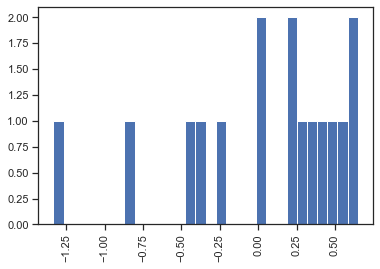

In [52]:
vals, bins, patches = plt.hist(data.Goals_coef, bins=30)
plt.xticks(rotation=90)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 <a list of 8 Text xticklabel objects>)

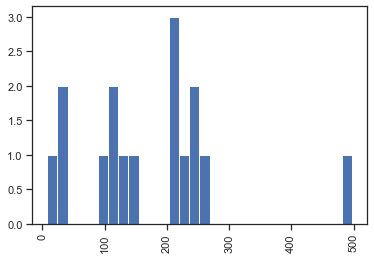

In [53]:
vals, bins, patches = plt.hist(data.Minutes_on_field, bins=30)
plt.xticks(rotation=90)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <a list of 7 Text xticklabel objects>)

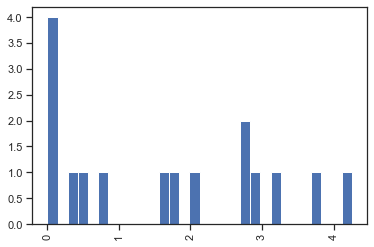

In [54]:
vals, bins, patches = plt.hist(data.first_assist, bins=30)
plt.xticks(rotation=90)

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 <a list of 8 Text xticklabel objects>)

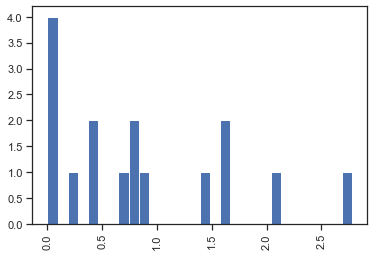

In [55]:
vals, bins, patches = plt.hist(data.Second_assist, bins=30)
plt.xticks(rotation=90)